# 基本分类

## 加载数据

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.13.1'

In [3]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.fashion_mnist.load_data()

In [4]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape,len(train_labels),train_labels[:10]

((60000, 28, 28), 60000, array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))

## 预处理数据

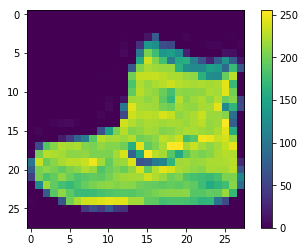

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

可以看到像素值介于0-255之间，将这些值缩小到0-1之间，然后将其馈送到神经网络模型。为此，要把图像数据从整数转换为浮点数，要保证对训练集和测试集的处理一致

In [7]:
train_images=train_images/255.0
test_images=test_images/255.0

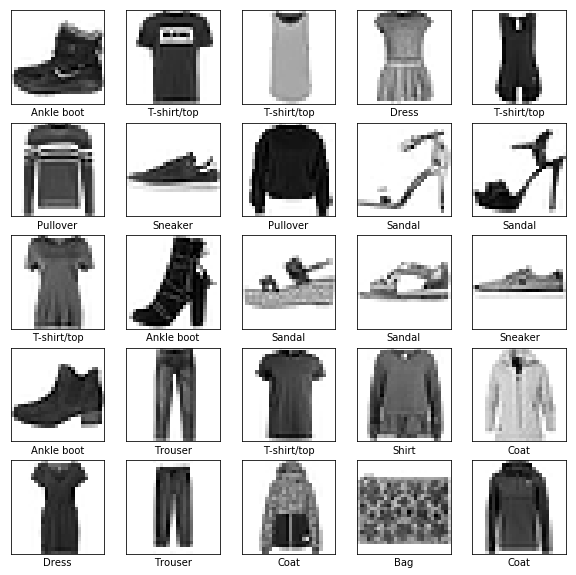

In [8]:
# 看一下训练集中的前25张图，并在每张图下显示类别名称，确保数据格式正确无误，然后就可以开始构建训练网络
plt.figure(figsize=(10,10))
for i in range(25):#从0-24
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])    #感觉很神奇，哈哈哈，如果不加imshow里面的cmap显示的就是彩色的，像热力图那样的彩色的

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型

**设置层**

+ 神经网络的基本构造块是层。层从馈送到其中的数据中提取表示结果，提取一些特征/表示，希望这些表示有助于解决当前的问题

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


+ 这个网络的第一层，将图像格式从28X28转换成一位数组 28X28=784 所以训练集的输入就变成 6kX784 一个矩阵 有784行，一列是一个记录。这个层没有要学习的参数，只是改变数据的格式
+ 扁平化操作之后，有两个Dense层，第一层是128个节点（神经元）。第二个是10个节点的sofymax层，该层会返回一个具有10个类别概率得分的数组，得分总和为1，这10个节点都包含一个得分，表示当前图像属于10个类别中某一个的概率

## 编译模型

模型还需要再进行几样设置才可以开始训练：

+ 损失函数-衡量模型在训练期间的准确率，我们希望尽可能缩小该函数，以‘引导’模型朝着正确的方法优化
+ 优化器-根据模型看到的数据及其损失函数更新模型的方式
+ 指标-用于监控训练和测试步骤

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.train.AdamOptimizer(),
             metrics=['accuracy'])

## 训练模型

训练模型需要进行以下步骤：

+ 将训练数据馈送到模型中
+ 模型学习将图像和标签相关联
+ 要对测试集进行预测
+ 开始训练，调用model.fit()方法，让模型开始拟合训练数据

batch_size: Integer or `None`.
        Number of samples per gradient update.
        If unspecified, `batch_size` will default to 32.
        Do not specify the `batch_size` if your data is in the
        form of symbolic tensors, dataset, dataset iterators,
        generators, or `keras.utils.Sequence` instances (since they generate
        batches).
        
        默认batch_size是32

In [11]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4918 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3757 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3359 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3102 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2919 - acc: 0.8906


## 评估准确率

In [12]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3366 - acc: 0.8774


In [13]:
test_acc,test_loss

(0.8774, 0.3365994269132614)

结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率。这种差异说明出现了过拟合。

+ **如果模型在新数据上的表现和训练数据上的表现差了很多（低于后者），就表现出现了过拟合**

## 预测

In [14]:
predictions=model.predict(test_images)

In [15]:
predictions[0]

array([4.4079493e-06, 1.7379808e-09, 7.8763065e-07, 1.5503750e-07,
       6.6115990e-07, 3.0628371e-03, 4.1711342e-06, 3.7061118e-02,
       2.0380392e-04, 9.5966208e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
# 可以将这个预测绘制成图来查看全部10个类别的概率
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    prediction_label=np.argmax(predictions_array)
    if prediction_label==true_label:
        color='blue'   #蓝色是预测正确的，红色是预测错误的
    else:
        color='red'
    
    # 100*np.amax(predictions_array)  和 上面的 np.argmax(predictions_array) 不一样，一个是找最大值的index，一个是取最大值
    plt.xlabel('{} {:0.2f}% ({})'.format(class_names[prediction_label],100*np.max(predictions_array),class_names[true_label]),color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot=plt.bar(range(10),predictions_array,color='#777777') #应该是一组array，默认都是灰色 x是0-9 y是predictions_array
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')  # 把predicted_label对应的类别序号设置为红色
    thisplot[true_label].set_color('blue')   #把真实标签对应的序号设置为蓝色，其余都是灰色，所以其实红色+灰色=1

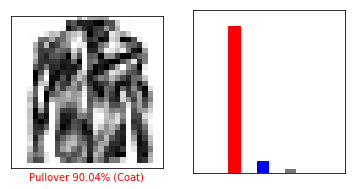

In [19]:
i=17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

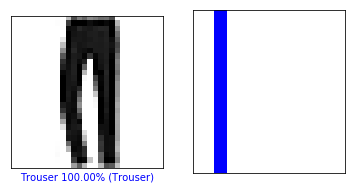

In [20]:
i=2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

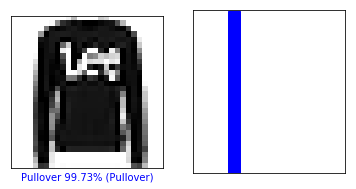

In [21]:
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

即使置信度非常高，也有可能预测错误

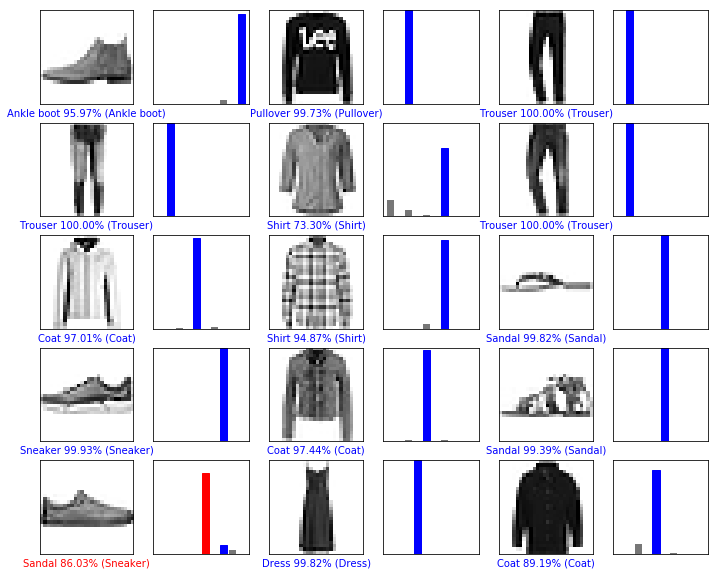

In [22]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))  #因为除了要显示图像之外，还要看这个概率柱状图，所以cols*2了
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

## 预测单张图片

In [23]:
img=test_images[0]

In [24]:
img.shape

(28, 28)

+ tf.keras模型已经过优化，可以一次性对样本批次或者样本集进行预测
+ 因此，如果想对单个图像进行预测，需要将其变成一个列表,变成和模型输入维度一致的array

In [25]:
img=(np.expand_dims(img,0))

In [26]:
img.shape

(1, 28, 28)

In [27]:
prediction_img=model.predict(img)

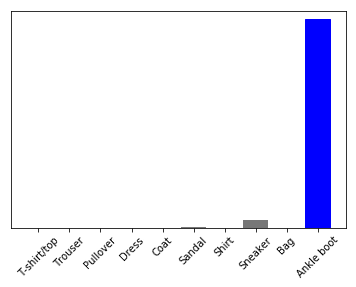

In [28]:
plot_value_array(0,predictions,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [29]:
class_names[np.argmax(prediction_img)],class_names[test_labels[0]]

('Ankle boot', 'Ankle boot')